<a href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/FPA/lectures/04_04_FPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower Pollination Algorithm (FPA)

##  1. Introduction

The **Flower Pollination Algorithm (FPA)** is a population-based optimization method developed by Xin-She Yang (2012). Inspired by the pollination process in flowering plants, the algorithm models two main types of pollination — **biotic (cross-pollination)** and **abiotic (self-pollination)**.

**Key Features:**
- Few parameters: *p*, *γ*, *λ*, and population size *n*.
- Robustness across various domains: image processing, classification, neural networks, engineering, etc.
- Scalability to both low- and high-dimensional problems.


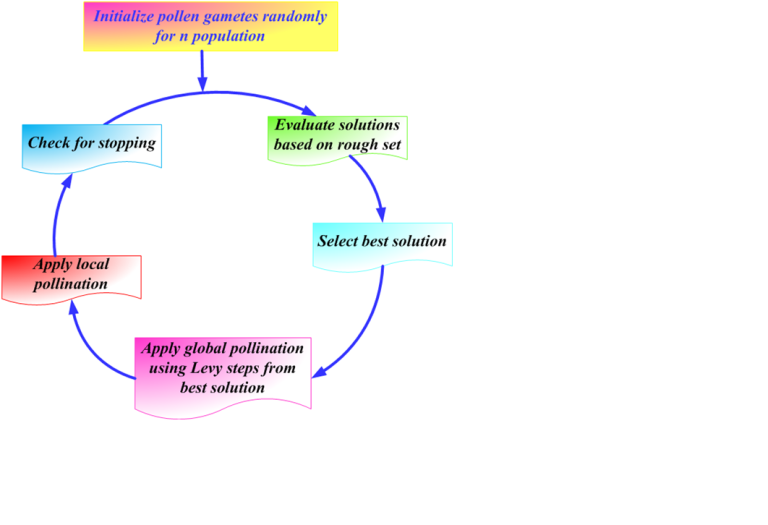

## 2. Characteristics of the Pollination Process


### 2.1 Biotic Process (Cross-Pollination)

* Represents about **90%** of flowering plants.
* Vectors include insects, birds, bats, bees, etc.
* These pollinators can perform **long-distance flights** that follow **Lévy distributions**, characterized by occasional long jumps interspersed with short movements.
* **Implication in FPA**: global search model

  $$
    x_i^{t+1} = x_i^t + \gamma\,L\,(g^* - x_i^t),
  $$

  where $L$ is a Lévy step generated using the Mantegna algorithm.


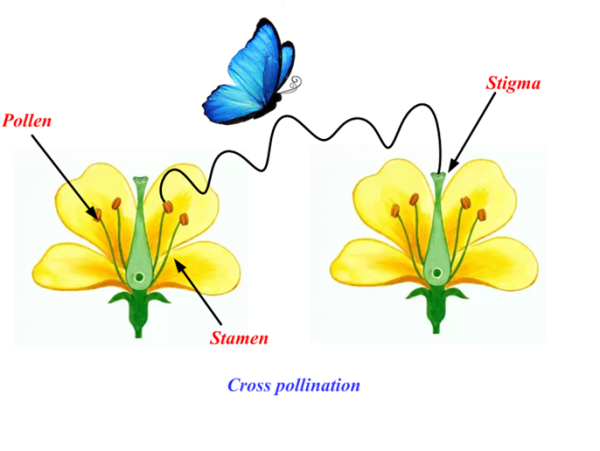

### 2.2 Abiotic Process or Self-Pollination

* Approximately **10%** of flowering plants.
* Pollen is transported by **wind** or **internal diffusion** between flowers of the same plant.
* Movements are always **short** and local.
* **Implication in FPA**: local search

  $$
    x_i^{t+1} = x_i^t + \varepsilon\,(x_j^t - x_k^t),\quad \varepsilon \sim U(0,1).
  $$


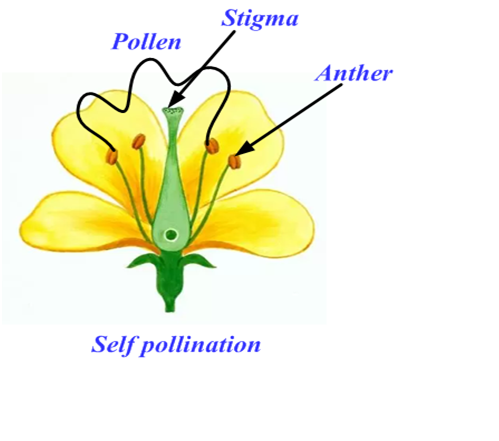

### 2.3 Flower Constancy

* Pollinators tend to repeatedly visit the **same species** of flower, optimizing energy use and increasing pollination efficiency.
* **In the algorithm**: this translates into a higher probability of crossover between similar solutions—using a similarity measure that favors local combinations of two nearby "flowers".


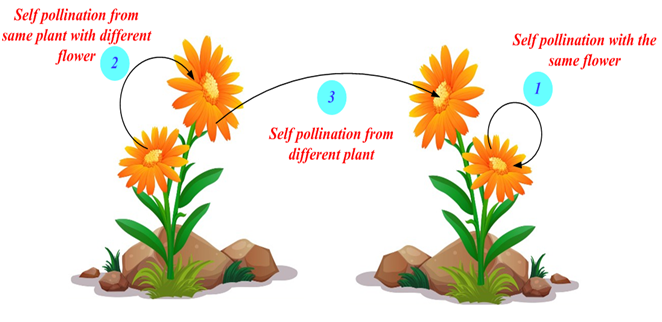

## 3. Fundamental Rules of FPA

| **Rule** | **Description** |
|----------|---------------------------------------------|
| **1. Biotic / Cross-Pollination → Global** | Biotic and cross-pollination are considered global pollination processes, where pollinators carrying pollen move according to *Lévy flight* trajectories. |
| **2. Abiotic / Self-Pollination → Local** | Local pollination is modeled using mechanisms such as abiotic pollination (by wind or gravity) and self-pollination. |
| **3. Flower Constancy** | Pollinators, such as insects, may develop *flower constancy*, which corresponds to a reproduction probability proportional to the similarity between two flowers. |
| **4. Switching Controlled by $p \in [0, 1]$** | The choice between local and global pollination is controlled by a switching probability $p$, usually biased slightly toward local pollination. |


## 4. Mathematical Model of FPA

1. **Global Pollination**

   Global pollination is modeled as a stochastic search process guided by the current best global solution $g^*$, with movements defined by Lévy flights:

   $$
   x_i^{t+1} = x_i^t + \gamma\,L(\lambda)\,(g^* - x_i^t),
   $$

   where:
   - $x_i^t$ is the current position of flower $i$ at iteration $t$,
   - $g^*$ is the best global solution found so far,
   - $\gamma > 0$ is a scaling factor,
   - $L(\lambda)$ is a random step drawn from a Lévy distribution with index $\lambda$.

   The Lévy distribution favors small steps but occasionally allows large jumps, promoting efficient exploration of the search space.

   The step $L$ can be generated using Mantegna's algorithm:

   $$
   L = \frac{U}{|V|^{1/\lambda}}, \quad
   U \sim \mathcal{N}(0, \sigma^2), \quad V \sim \mathcal{N}(0, 1),
   $$

   with:

   $$
   \sigma^2 = \left[\frac{\Gamma(1 + \lambda)}{\lambda\,\Gamma\left(\frac{1 + \lambda}{2}\right)} \cdot \frac{\sin\left(\frac{\pi\lambda}{2}\right)}{2^{\frac{\lambda - 1}{2}}}\right]^{1/\lambda}.
   $$

2. **Local Pollination**

   Local pollination simulates self-pollination or local interactions between neighboring flowers, represented by:

   $$
   x_i^{t+1} = x_i^t + \varepsilon (x_j^t - x_k^t),
   $$

   where:
   - $x_j^t$ and $x_k^t$ are two randomly selected solutions from the population,
   - $\varepsilon$ is a random number drawn from a uniform distribution in $[0,1]$.

   This operator introduces controlled local perturbations, favoring refinement (local exploitation) of the search space.

3. **Switch Probability**

   At each iteration, the algorithm decides between global and local pollination based on a switch probability $p$:

   - If $\mathrm{rand} < p$, apply global pollination.
   - Otherwise, apply local pollination.

4. **Flower Constancy**

   Flower constancy refers to the tendency of a pollinator to repeatedly visit flowers of the same species or color. In the algorithm, this translates to a higher probability of crossover between similar flowers, influencing how solutions are selected and combined during pollination.


## 4. Flow Chart of FPA

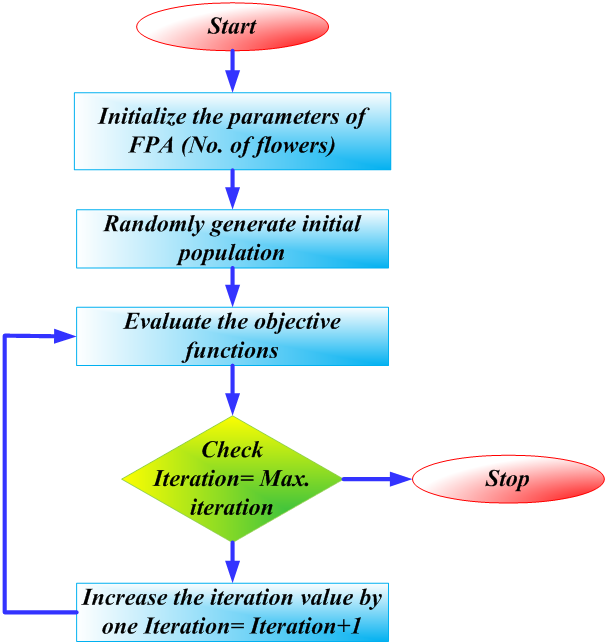

## 5. Flower Pollination Algorithm

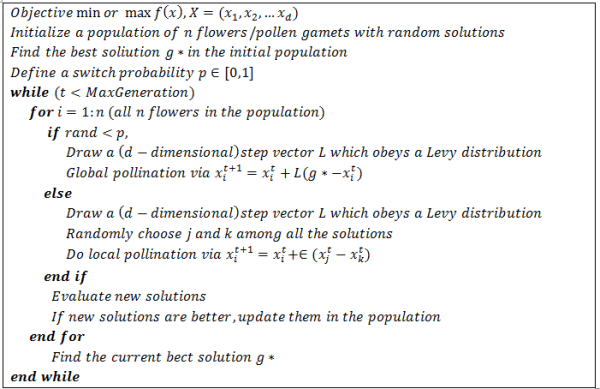

## Implementation

In [26]:
import numpy as np
import math

# -------- Rosenbrock Function --------
def rosenbrock(x):
    return 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# -------- Levy step via Mantegna --------
def levy_step(beta):
    # use math.gamma
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.normal(0, sigma_u, size=1)
    v = np.random.normal(0, 1, size=1)
    return u / abs(v) ** (1 / beta)

# -------- Flower Pollination Algorithm --------
def fpa(func, bounds, n=25, p=0.8, gamma=0.1, lam=1.5, n_iter=100):
    dim = bounds.shape[0]
    # Initialize population
    pop = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n, dim))
    fitness = np.apply_along_axis(func, 1, pop)
    best_idx = np.argmin(fitness)
    best = pop[best_idx].copy()
    hist = [fitness[best_idx]]

    for _ in range(n_iter):
        for i in range(n):
            if np.random.rand() < p:
                L = levy_step(lam)
                pop[i] += gamma * L * (best - pop[i])
            else:
                j, k = np.random.choice(n, 2, replace=False)
                eps = np.random.rand()
                pop[i] += eps * (pop[j] - pop[k])
            # Boundary control
            pop[i] = np.clip(pop[i], bounds[:, 0], bounds[:, 1])
            # Evaluation
            val = func(pop[i])
            if val < fitness[i]:
                fitness[i] = val
                if val < fitness[best_idx]:
                    best_idx = i
                    best = pop[i].copy()
        hist.append(fitness[best_idx])
    return best, fitness[best_idx], np.array(hist)

# -------- Execution on Rosenbrock --------
bounds_rb = np.array([[-5, 5], [-5, 5]])
best, best_val, history = fpa(rosenbrock, bounds_rb,
                              n=30, p=0.8, gamma=0.1, lam=1.5, n_iter=500)

print("Rosenbrock — best x:", best, "| f(x) =", best_val)

Rosenbrock — best x: [0.98220952 0.95217415] | f(x) = 0.016095368835917064


In [27]:
import numpy as np
import math

# -------- Ackley Function --------
def ackley(x):
    d = len(x)
    term1 = -20.0 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / d))
    term2 = -np.exp(np.sum(np.cos(2*np.pi*x)) / d)
    return term1 + term2 + 20 + np.e

# -------- Levy step via Mantegna --------
def levy_step(beta):
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.normal(0, sigma_u)
    v = np.random.normal(0, 1)
    return u / abs(v) ** (1 / beta)

# -------- Flower Pollination Algorithm --------
def fpa(func, bounds, n=30, p=0.8, gamma=0.1, lam=1.5, n_iter=100):
    dim = bounds.shape[0]
    pop = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n, dim))
    fitness = np.apply_along_axis(func, 1, pop)
    best_idx = np.argmin(fitness)
    best = pop[best_idx].copy()
    hist = [fitness[best_idx]]

    for _ in range(n_iter):
        for i in range(n):
            if np.random.rand() < p:
                L = levy_step(lam)
                pop[i] += gamma * L * (best - pop[i])
            else:
                j, k = np.random.choice(n, 2, replace=False)
                eps = np.random.rand()
                pop[i] += eps * (pop[j] - pop[k])
            pop[i] = np.clip(pop[i], bounds[:, 0], bounds[:, 1])
            val = func(pop[i])
            if val < fitness[i]:
                fitness[i] = val
            if val < fitness[best_idx]:
                best_idx = i
                best = pop[i].copy()
        hist.append(fitness[best_idx])

    return best, fitness[best_idx], np.array(hist)

# -------- Execution on Ackley --------
bounds_ak = np.array([[-32, 32], [-32, 32]])

best_x, best_val, history = fpa(
    ackley,
    bounds_ak,
    n=30,        # population
    p=0.8,       # switch probability
    gamma=0.1,   # Lévy jump scale
    lam=1.5,     # Lévy's exponent
    n_iter=500   # iterations
)
print("Ackley — best x:", best_x, "| f(x) =", best_val)


Ackley — best x: [0.07008707 0.00524443] | f(x) = 0.3251350472656651


## Using the pyMetaheuristic Library


In [5]:
!pip install pyMetaheuristic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.9 MB/s eta 0:00:00


In [28]:
import numpy as np
from pyMetaheuristic.algorithm.fpa import flower_pollination_algorithm

# --- Define your objective function ---
def rosenbrock(x):
    return 100.0*(x[1] - x[0]**2)**2 + (1 - x[0])**2

# --- Problem parameters ---
params = {
    'flowers'     : 30,         # number of flowers (population size)
    'min_values'  : (-5, -5),   # lower bounds
    'max_values'  : (5,  5),    # upper bounds
    'iterations'  : 500,        # number of iterations
    'gama'        : 0.1,        # Lévy step scale factor
    'lamb'        : 1.5,        # Lévy exponent
    'p'           : 0.8,        # switch probability
    'verbose'     : False,      # show progress if True
    'start_init'  : None,       # custom initialization
    'target_value': None        # stopping criterion (optional)
}

# --- Run FPA ---
best = flower_pollination_algorithm(
    target_function = rosenbrock,
    **params
)

# --- Extract output ---
x_opt = best[:-1]
f_opt = best[-1]

print("best x:", x_opt)
print("best f(x):", f_opt)


best x: [1.04524255 1.09756079]
best f(x): 0.004575766831782626


In [29]:
import numpy as np
from pyMetaheuristic.algorithm.fpa import flower_pollination_algorithm

# -------- Ackley Function --------
def ackley(x):
    d = len(x)
    term1 = -20.0 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / d))
    term2 = -np.exp(np.sum(np.cos(2 * np.pi * x)) / d)
    return term1 + term2 + 20 + np.e

# -------- FPA Parameters (as in Yang 2012) --------
params = {
    'flowers'     : 30,           # population size
    'min_values'  : (-32, -32),   # lower bounds
    'max_values'  : ( 32,  32),   # upper bounds
    'iterations'  : 500,          # number of iterations
    'gama'        : 0.1,          # Levy flight scale
    'lamb'        : 1.5,          # Levy exponent
    'p'           : 0.8,          # switch probability
    'verbose'     : False,         # show progress per iteration
    'start_init'  : None,         # random initialization
    'target_value': None          # no early stopping
}

# -------- Run FPA --------
result = flower_pollination_algorithm(
    target_function = ackley,
    **params
)

# result is [x0, x1, f(x)]
best_x = result[:-1]
best_f = result[-1]

print("Ackley — best x:", best_x, "| f(x) =", best_f)

Ackley — best x: [0.00830849 0.00381283] | f(x) = 0.02808027744459851


## 6. MOFPA — Multi-Objective Flower Pollination Algorithm

MOFPA is an extension of the FPA designed for multi-objective optimization problems. The algorithm aims to approximate the **Pareto-optimal front**, while maintaining both **diversity** and **convergence** through the same global/local pollination strategies, adapted to the multi-objective context.

### 6.1. Vector Representation

Given a problem with $m$ objectives to minimize:

$$
\min \mathbf{f}(x) = \big(f_1(x), f_2(x), \dots, f_m(x)\big),
$$

a solution $x_i$ dominates $x_j$ if:

- $f_k(x_i) \le f_k(x_j)\; \forall k = 1, \dots, m$, and  
- $\exists\; k$ such that $f_k(x_i) < f_k(x_j)$.

### 6.2. Global Pollination

As in standard FPA, the global update is given by:

$$
x_i^{t+1} = x_i^t + \gamma\,L(\lambda)\,(\tilde{g}^* - x_i^t),
$$

where $\tilde{g}^*$ is a solution selected from the **current Pareto front**, based on dominance or diversity criteria (e.g., random selection from the non-dominated set).

### 6.3. Local Pollination

Likewise, local search is performed as:

$$
x_i^{t+1} = x_i^t + \varepsilon\,(x_j^t - x_k^t), \quad \varepsilon \sim U(0,1),
$$

with $x_j$ and $x_k$ randomly selected, preferably from non-dominated solutions.

### 6.4. Pareto Front Selection

After each iteration:
- New solutions are combined with the previous population.
- A dominance filter is applied to extract the updated non-dominated set (approximate Pareto front).
- A diversity criterion (e.g., crowding distance) may be applied to maintain a fixed population size.

### 6.5. Switching Probability $p$

The choice between global and local pollination is still governed by a **switching probability $p$**.
